In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

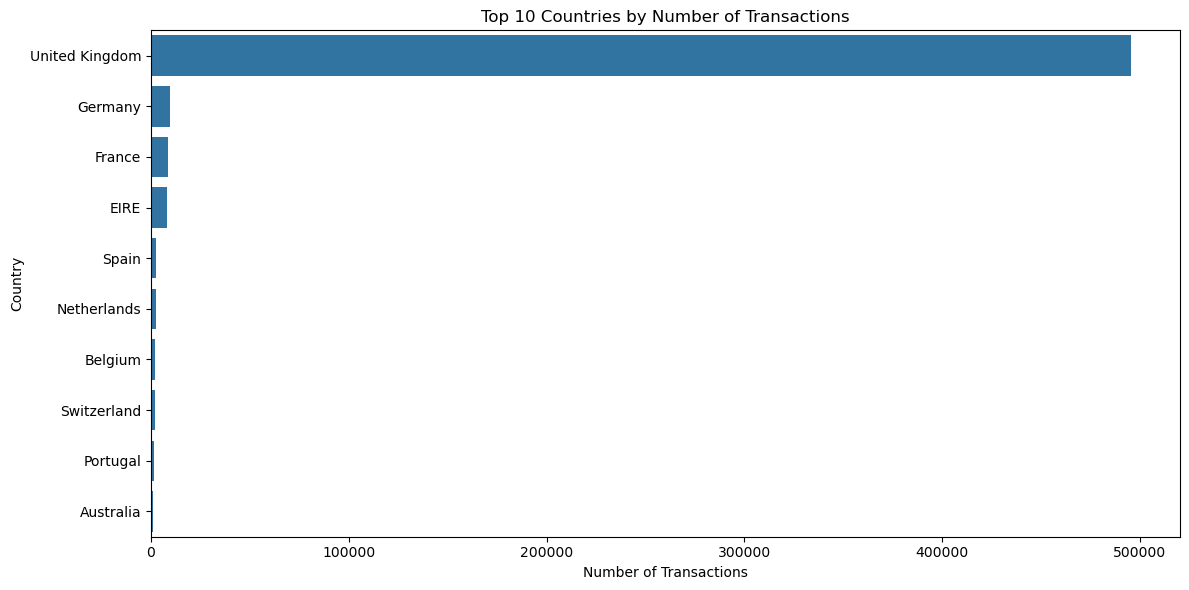

In [2]:

plt.figure(figsize=(12, 6))
top_countries = X['Country'].value_counts().nlargest(10).index
sns.countplot(data=X[X['Country'].isin(top_countries)], y='Country', order=top_countries)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


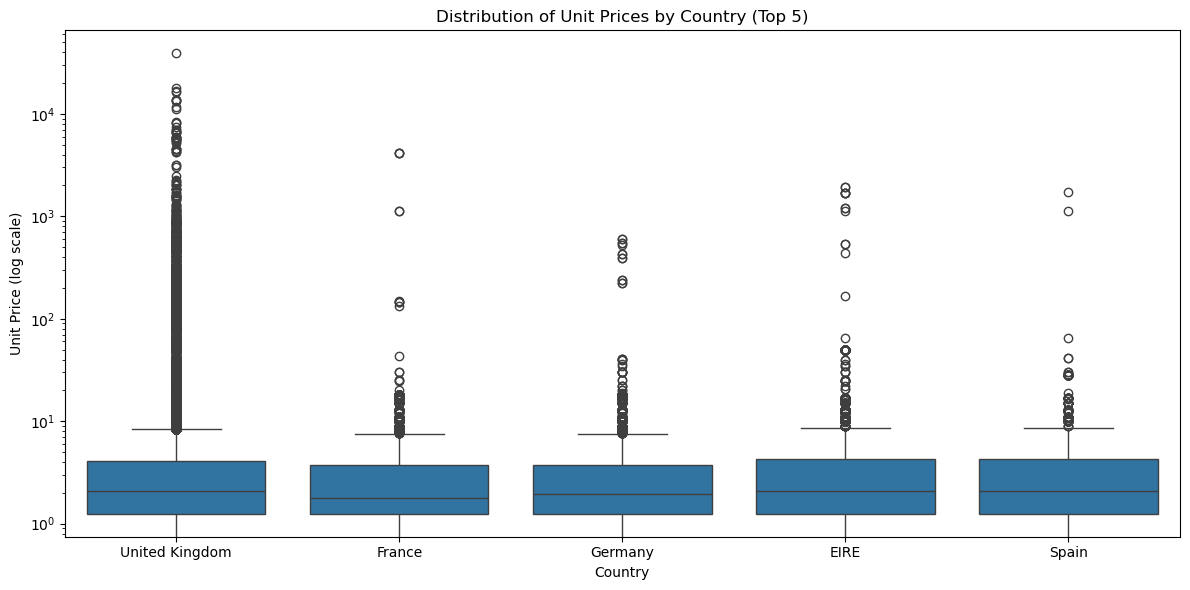

In [3]:
top_5_countries = X['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[X['Country'].isin(top_5_countries)], x='Country', y='UnitPrice')
plt.yscale('log')
plt.title('Distribution of Unit Prices by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Unit Price (log scale)')
plt.tight_layout()
plt.show()


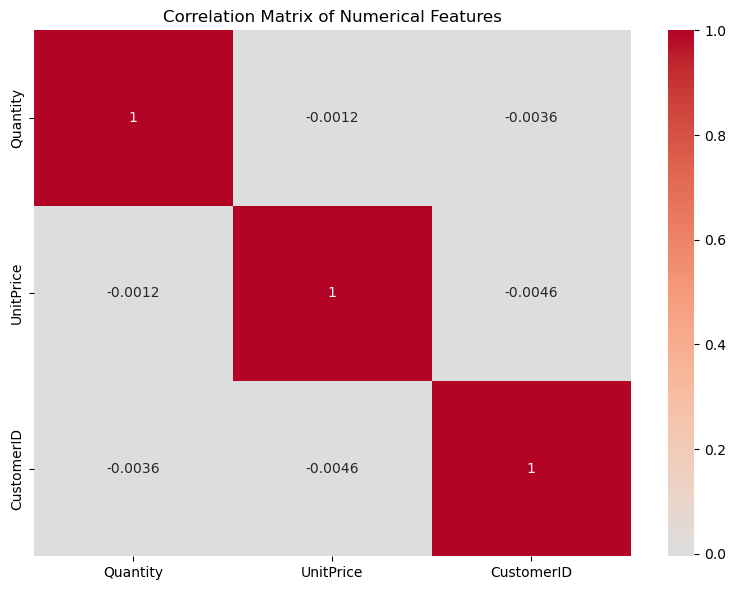

In [4]:
import numpy as np

numerical_data = X[['Quantity', 'UnitPrice']].copy()
numerical_data['CustomerID'] = pd.to_numeric(X['CustomerID'], errors='coerce')
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_14588\844717669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Quantity'] = pd.to_numeric(X['Quantity'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_14588\844717669.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quantity_by_country.index, y=avg_quantity_by_country.values, palette='viridis')


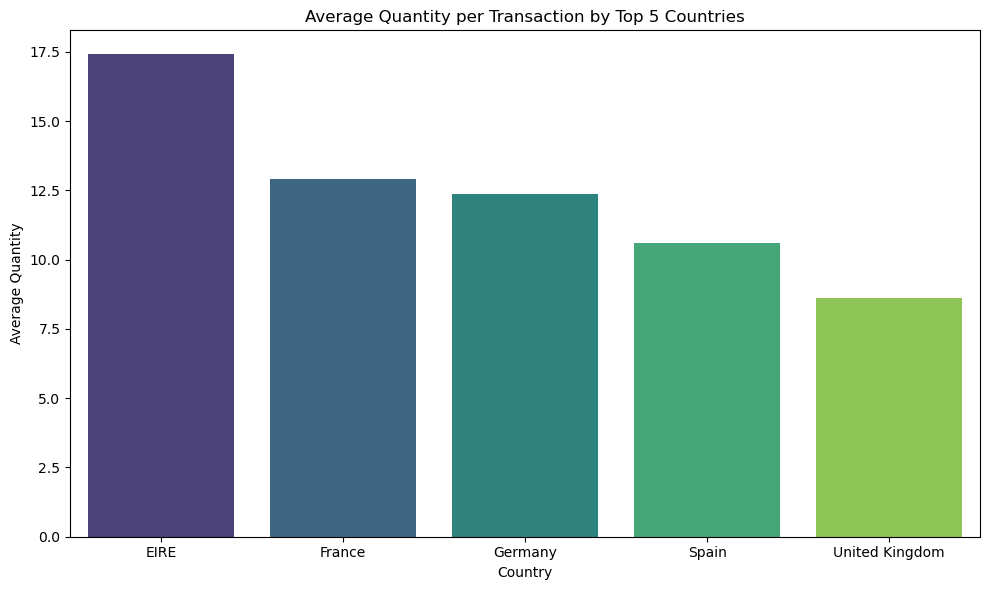

In [24]:

online_retail = fetch_ucirepo(id=352)
X = online_retail.data.features

# Convert Quantity to numeric
X['Quantity'] = pd.to_numeric(X['Quantity'], errors='coerce')

# Get top 5 countries by number of transactions
top_countries = X['Country'].value_counts().nlargest(5).index

# Filter to top countries
top_country_data = X[X['Country'].isin(top_countries)]

# Group by Country and calculate average quantity
avg_quantity_by_country = top_country_data.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_quantity_by_country.index, y=avg_quantity_by_country.values, palette='viridis')
plt.title('Average Quantity per Transaction by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.tight_layout()
plt.show()


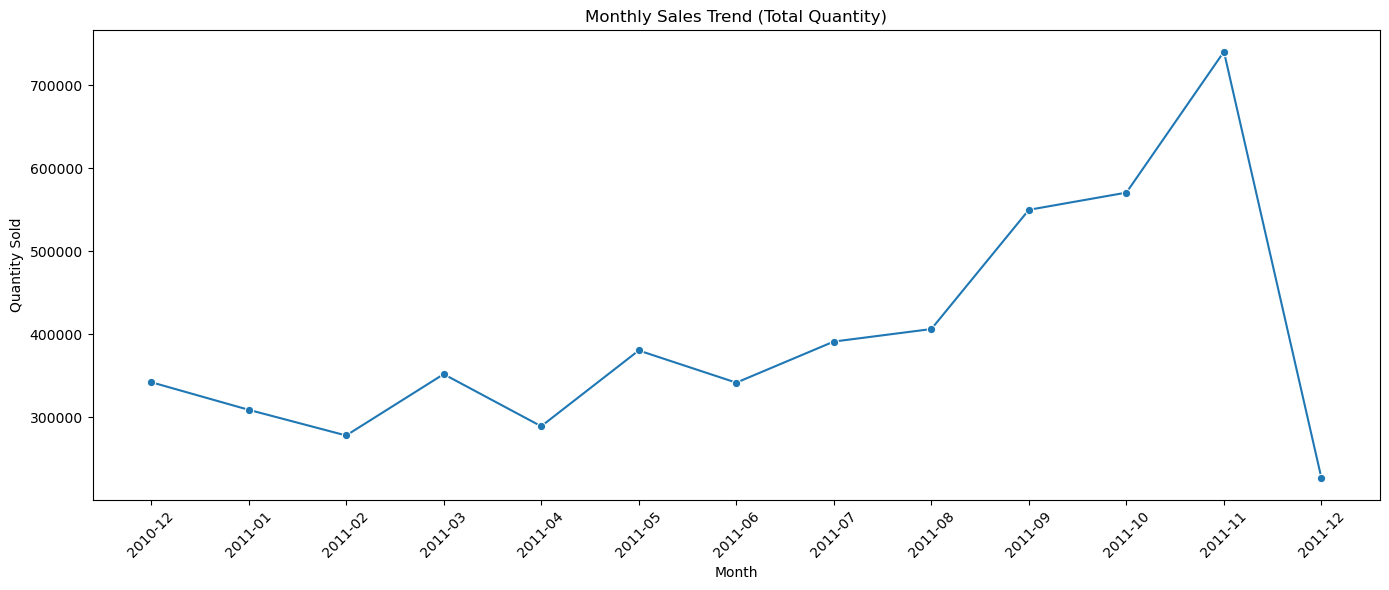

In [10]:
# Create a copy to safely modify
sales_data = X.copy()

# Convert InvoiceDate to datetime and extract month
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'], errors='coerce')
sales_data['Month'] = sales_data['InvoiceDate'].dt.to_period('M').astype(str)

# Group by Month and sum Quantity
monthly_sales = sales_data.groupby('Month')['Quantity'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Quantity', marker='o')
plt.title('Monthly Sales Trend (Total Quantity)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
